<a href="https://colab.research.google.com/github/aframires/drum-loop-synthesis/blob/main/LOOPNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOOPNET: Musical Loop Synthesis Conditioned on Intuitive Musical Parameters

**Pritish Chandna, António Ramires, Xavier Serra and Emilia Gómez**

In this notebook, we showcase the work we have conducted for generating drum loops. You will be able to experiment with drum loops and extract some of their characteristics. These characteristics will then be used to generate a new loop based on this analysis. For more 

## Setup

Run the following cell to set everything up! It might take a bit, so please be patient!



In [1]:
%%capture
%tensorflow_version 1.x
!pip uninstall -y mido
!pip install mido==1.2.9
!pip install scipy
!pip install madmom
!pip install ADTLib
!pip install soundfile
!pip install essentia
!pip install timbral_models
!pip install essentia
!git clone https://github.com/aframires/drum-loop-synthesis.git

%cd drum-loop-synthesis
!mkdir analysis
%cd /content/drum-loop-synthesis
!mkdir output
%cd /content/drum-loop-synthesis

import gdown
gdown.download('https://drive.google.com/uc?id=1Td-4EQhtA3KjHn90DObnxSZPdOLmFjG4', 'models.tar.gz', False)
!tar -xvzf models.tar.gz

from colab_utils import *

## Previewing Loops

In our github, we provide 4 example loops, let's hear how they sound!


In [2]:
import IPython.display as ipd
import soundfile as sf

loop1, sr1 = sf.read('example_loops/loop1.wav')
print("Loop 1")
ipd.display(ipd.Audio(loop1,rate=sr1))

loop2, sr2 = sf.read('example_loops/loop2.wav')
print("Loop 2")
ipd.display(ipd.Audio(loop2,rate=sr2))

loop3, sr3 = sf.read('example_loops/loop3.wav')
print("Loop 3")
ipd.display(ipd.Audio(loop3,rate=sr3))

loop4, sr4 = sf.read('example_loops/loop4.wav')
print("Loop 4")
ipd.display(ipd.Audio(loop4,rate=sr4))

Loop 1


Loop 2


Loop 3


Loop 4


## Loop Analysis

We start by analysing the example loops, to extract all the necessary features.

In [3]:
%%capture

import tensorflow as tf

pattern1,hpcp1,kick_timbre1,snare_timbre1,hh_timbre1 = analysis_function('example_loops/loop1.wav',sr1)
pattern2,hpcp2,kick_timbre2,snare_timbre2,hh_timbre2 = analysis_function('example_loops/loop2.wav',sr2)
pattern3,hpcp3,kick_timbre3,snare_timbre3,hh_timbre3 = analysis_function('example_loops/loop3.wav',sr3)
pattern4,hpcp4,kick_timbre4,snare_timbre4,hh_timbre4 = analysis_function('example_loops/loop4.wav',sr4)

tf.keras.backend.clear_session()


### Visualising the loops features

Loop 1


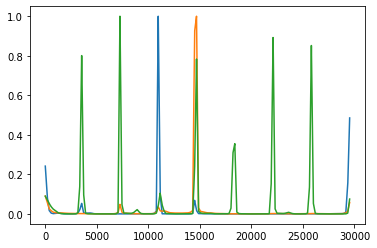

[0.8512572851844777, 0.4236444040385547, 0.447672365512707, 0.48394367252023496, 0.827431340578901, 0.6893321958385316, 0.22493644765214424]
[0.7169853377251562, 0.46003628489976567, 0.5193597393779732, 0.5991573945245211, 0.715288913950662, 0.6015077832150364, 0.507280064518335]
[0.86376847 1.         1.         1.         0.         1.
 1.        ]
[0.3621901  0.08996975 0.21972021 0.2626606  0.05132333 0.23249538
 0.2982671  0.18333471 1.         0.17560014 0.5419003  0.24077374]
Loop 2


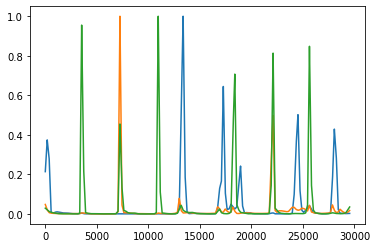

[0.8504130411811093, 0.42794519256760255, 0.44477862056218, 0.4583366759736716, 0.7137836569308394, 0.6574509977520074, 0.4246341476870975]
[0.7686268255988377, 0.5480859201121963, 0.5174109797262166, 0.511545166202348, 0.7285284262544016, 0.5966337289746114, 0.2919584083027768]
[0.9017448  1.         0.98560249 1.         0.         1.
 0.96757656]
[0.4426114  0.2961965  0.23183121 0.4110799  0.16744617 0.32632664
 0.2778395  0.46685192 1.         0.260979   0.34516406 0.29149964]
Loop 3


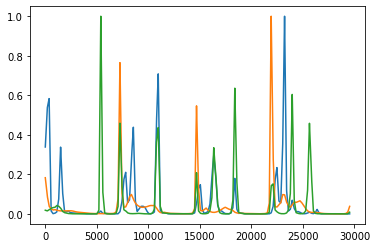

[0.8888876882368816, 0.49494705847749065, 0.40973424805017, 0.46660767254399943, 0.7293928199174812, 0.6864804674964988, 0.40534572277828307]
[0.7870829162188704, 0.4776023223972167, 0.5078031476066738, 0.572505756314472, 0.8007439493895656, 0.5973809795485395, 0.24407384146358432]
[0.85935348 1.         1.         1.         1.         1.
 0.95112843]
[0.23047861 0.313981   0.36668858 0.2108018  0.18231352 0.20307265
 0.10245621 0.2076553  1.         0.21451159 0.23385859 0.12902063]
Loop 4


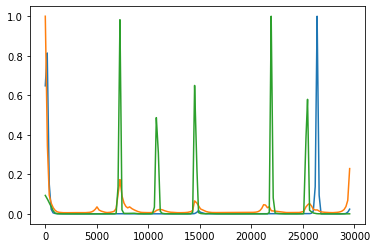

[0.8190971049549586, 0.33004048666023145, 0.42882877050172025, 0.45306612552166464, 0.8990013239141177, 0.6678146529261103, 0.0]
[0.7314147072891386, 0.35612844676131267, 0.5517559456460566, 0.6184531558301188, 0.8127171864053828, 0.5443790909280617, 0.11099057649294626]
[0.85573268 1.         1.         1.         0.         1.
 1.        ]
[0.11320473 0.11391194 0.12453418 0.08146761 0.06927716 0.12632136
 0.14622161 0.19217873 1.         0.18502872 0.16941282 0.14672244]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Loop 1")
plt.plot(pattern1[0])
plt.show()
print(kick_timbre1)
print(snare_timbre1)
print(hh_timbre1)
print(hpcp1)

print("Loop 2")
plt.plot(pattern2[0])
plt.show()
print(kick_timbre2)
print(snare_timbre2)
print(hh_timbre2)
print(hpcp2)

print("Loop 3")
plt.plot(pattern3[0])
plt.show()
print(kick_timbre3)
print(snare_timbre3)
print(hh_timbre3)
print(hpcp3)

print("Loop 4")
plt.plot(pattern4[0])
plt.show()
print(kick_timbre4)
print(snare_timbre4)
print(hh_timbre4)
print(hpcp4)

## Loop Generation
In this section we will explore of the possibilities of generation provided by our system.

### Reconstructing original loops

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Original Loop 1


Reconstructed Loop 1


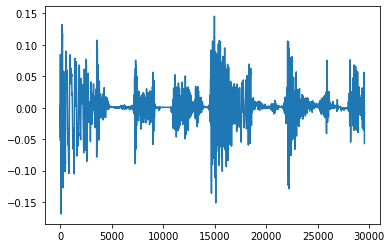

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Original Loop 2


Reconstructed Loop 2


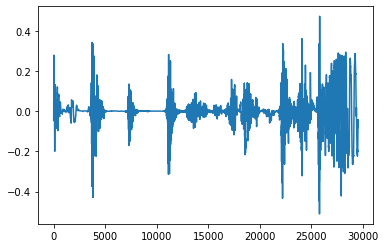

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Original Loop 3


Reconstructed Loop 3


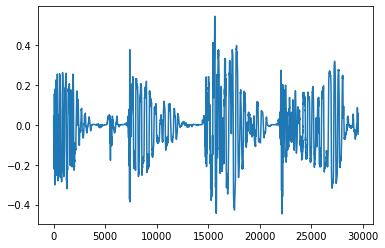

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Original Loop 4


Reconstructed Loop 4


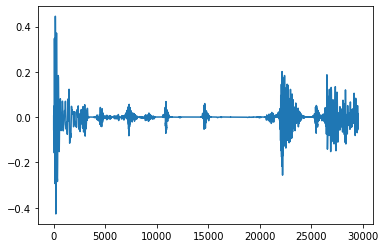

In [5]:
%matplotlib inline
tf.keras.backend.clear_session()

generate(pattern1,hpcp1,kick_timbre1,snare_timbre1,hh_timbre1)
data1, sr = sf.read('output/output_multi_noenv.wav')
print("Original Loop 1")
ipd.display(ipd.Audio(loop1,rate=sr1))
print("Reconstructed Loop 1")
ipd.display(ipd.Audio(data1,rate=sr))
plt.plot(data1)
plt.show()
tf.keras.backend.clear_session()

generate(pattern2,hpcp2,kick_timbre2,snare_timbre2,hh_timbre2)
data2, sr = sf.read('output/output_multi_noenv.wav')
print("Original Loop 2")
ipd.display(ipd.Audio(loop2,rate=sr2))
print("Reconstructed Loop 2")
ipd.display(ipd.Audio(data2,rate=sr))
plt.plot(data2)
plt.show()
tf.keras.backend.clear_session()

generate(pattern3,hpcp3,kick_timbre3,snare_timbre3,hh_timbre3)
data3, sr = sf.read('output/output_multi_noenv.wav')
print("Original Loop 3")
ipd.display(ipd.Audio(loop3,rate=sr3))
print("Reconstructed Loop 3")
ipd.display(ipd.Audio(data3,rate=sr))
plt.plot(data3)
plt.show()
tf.keras.backend.clear_session()

generate(pattern4,hpcp4,kick_timbre4,snare_timbre4,hh_timbre4)
data4, sr = sf.read('output/output_multi_noenv.wav')
print("Original Loop 4")
ipd.display(ipd.Audio(loop4,rate=sr4))
print("Reconstructed Loop 4")
ipd.display(ipd.Audio(data4,rate=sr))
plt.plot(data4)
plt.show()
tf.keras.backend.clear_session()

# Playground
In this section, we provide several utilites so that the user can create his own loops, by using a midi like representation or their own audio loops. You can mix and match the timbre, pattern and tonal content of different loops, isolate the different components of a loop and more!

### Uploading audio

In [ ]:
from google.colab import files
from essentia.standard import MonoLoader
from colab_utils import *

%%capture

uploaded = files.upload()
filename = 'uploaded_loop.wav'
audio = es.MonoLoader(filename=list(uploaded.keys())[0])
sf.write(filename,audio()[0:81415],16000)
pattern,hpcp,kick_timbre,snare_timbre,hh_timbre = analysis_function(filename)

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Original Loop 4


Reconstructed Loop 4


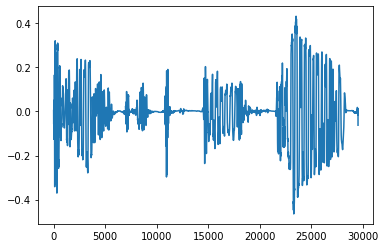

In [34]:
tf.keras.backend.clear_session()
generate(pattern,hpcp,kick_timbre,snare_timbre,hh_timbre)
gen, sr1 = sf.read('output/output_multi_noenv.wav')
orig, sr2 = sf.read(filename)
print("Original Loop 4")
ipd.display(ipd.Audio(list(uploaded.keys())[0]))
print("Reconstructed Loop 4")
ipd.display(ipd.Audio(gen,rate=sr1))
plt.plot(gen)


### MIDI-like representation

Using the model in /content/drum-loop-synthesis/models/log_multi_noenv/model.ckpt-115
Generated Loop


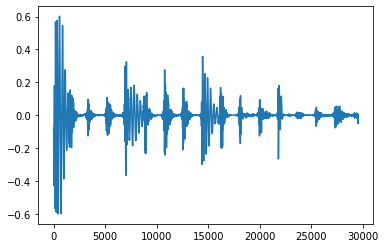

In [ ]:
tf.keras.backend.clear_session()

# Fill this array with the velocity values for each step of the drum pattern
#                1  2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
gen_pattern =  [[1, 0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0], #kick
                [0, 0,  1,  0,  1,  0,  1,  0,0.2,  0,  1,  0,  0,  0,  0,  0], #snare
                [0, 1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1]] #hh

pattern = generate_gaussians(gen_pattern)

# Fill this array with the timbre values for each drum sound
# [warmth, roughness, brightness, hardness, boominess, depth, sharpness]
features_hh    =    [0.5,0.5,0.5,0.5,0.5,0.9,0.9]
features_snare =    [0.5,0.1,0.2,0.8,0.5,0.5,0.5]
features_kick  =    [0.5,0.5,0.5,0.5,1.0,0.5,0.5]

# To add a tonal component to the loop, add values for the desired pitch classes
#       C   C#  D   D#  E   F   F#  G   G#    A   A#  B
hpcp = [0,  0,  0,  0,  0,  1,  0,  0,  0.5,  0,  0,  0]

pattern = generate_gaussians(gen_pattern)

generate(pattern, hpcp, features_kick, features_hh, features_kick)

data, sr = sf.read('output/output_multi_noenv.wav')
print("Generated Loop")
ipd.display(ipd.Audio(data,rate=sr))
plt.plot(data)